# pipeline 文生图设置参数

In [1]:
from diffusers import AutoPipelineForText2Image
import torch

model_path="/models/stable-diffusion-v1-5"
pipeline = AutoPipelineForText2Image.from_pretrained(
	model_path, torch_dtype=torch.float16, variant="fp16"
).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


## 高度和宽度

需要考虑数值是 8 的倍数。

  0%|          | 0/50 [00:00<?, ?it/s]

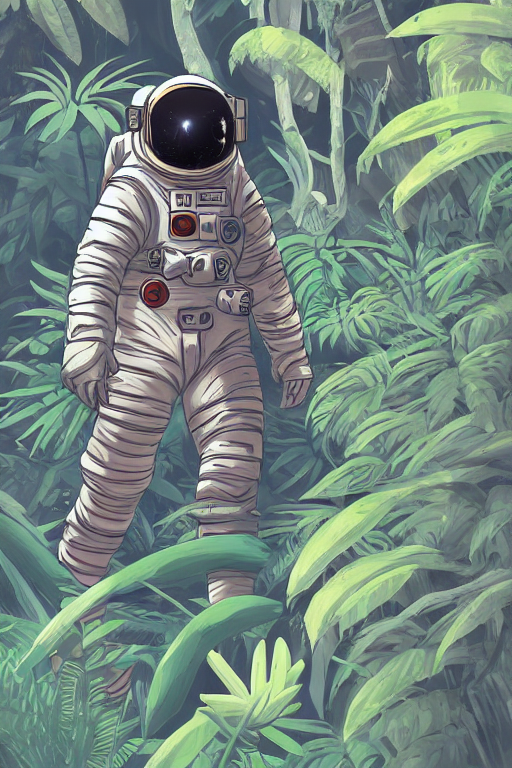

In [2]:
image = pipeline(
	"Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", height=768, width=512
).images[0]
image

## guidance scale

较低的值使模型具有“创造力”，可以生成与提示相关性更松散的图像。

  0%|          | 0/50 [00:00<?, ?it/s]

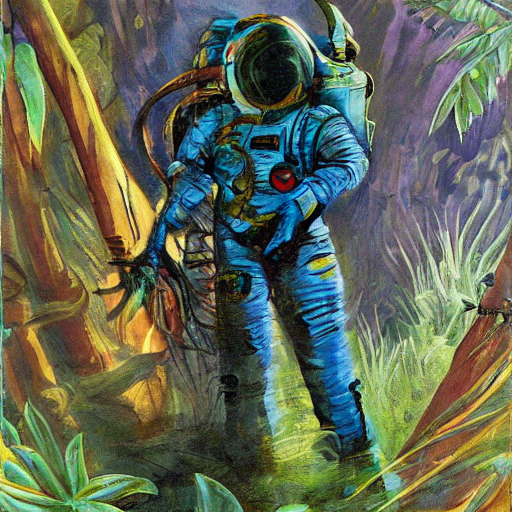

In [4]:
image = pipeline(
	"Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", guidance_scale=3
).images[0]
image

## 负面提示词

否定提示会引导模型远离您不希望模型生成的内容。

  0%|          | 0/50 [00:00<?, ?it/s]

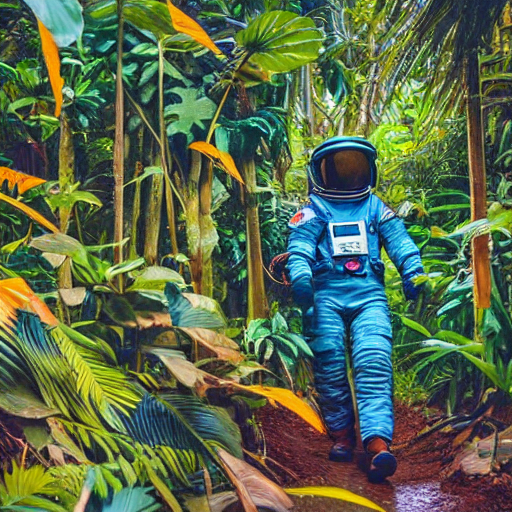

In [3]:
image = pipeline(
	prompt="Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",
	negative_prompt="ugly,light dark, deformed, disfigured, poor details, bad, anatomy",
).images[0]
image

## 手动设置 seed

默认是随机生成。下面代码每次执行都生成相同的图形。

  0%|          | 0/50 [00:00<?, ?it/s]

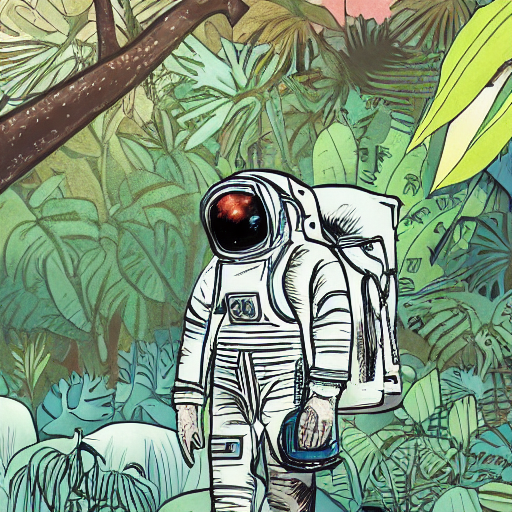

In [6]:
generator = torch.Generator(device="cuda").manual_seed(310)
image = pipeline(
	"Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",
    guidance_scale=5.5,
	generator=generator,
).images[0]
image

## 提示词的权重

建议使用 [Compel](https://github.com/damian0815/compel) 库来帮助您生成加权提示嵌入。

In [7]:
!pip install compel

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


  0%|          | 0/20 [00:00<?, ?it/s]

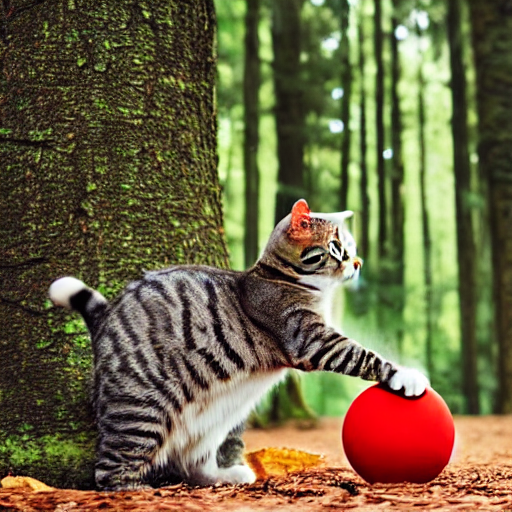

In [12]:
from compel import Compel

compel = Compel(tokenizer=pipeline.tokenizer, text_encoder=pipeline.text_encoder)

# upweight "ball"
prompt = "a cat playing with a ball++ in the forest"
conditioning = compel.build_conditioning_tensor(prompt)
# or: conditioning = compel([prompt])

generator = torch.Generator(device="cuda").manual_seed(100399)

# generate image
images = pipeline(prompt_embeds=conditioning, num_inference_steps=20, generator=generator).images
images[0]